In [57]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Homework 6: Simulation

## References

* [Sections 10.1 - 10.4](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html)
* [`datascience` Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-fa23/resources/quick_reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- We encourage you to discuss this assignment with others but make sure to write and submit your own code. Refer to the syllabus to learn more about how to learn cooperatively.
- Unless you are asked otherwise, use the non-interactive visualizations when asked to produce a visualization for a task.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following code cell to import the tools for this assignment.

In [58]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Roulette Again

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="./roulette_wheel.jpeg" alt="roulette wheel" width="330px">

Run the cell below to load the `wheel` table.

In [59]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red

If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- if the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

#### Task 01 📍

Define a function `dollar_bet_on_red`. The function definition should:
1. Have one argument `color` that is a `str` for the name of a color.
2. Return your gain in dollars as an `int` if that color had won and you had placed a one-dollar bet on red. 

Consider the following as you work:
* Remember that the gain can be negative.
* Make sure your function returns an integer.
* You can assume that the only colors that will be passed as arguments are `'red'`, `'black'`, and `'green'`. Your function doesn't have to check that the input is correct.

_Points:_ 3

In [60]:
def dollar_bet_on_red(color):
    if color == 'red':
        return 1
    else:
        return -1

In [61]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ Your function correctly returns 1 when it is called on 'red'.

Run the cell below to make sure your function is working.

In [62]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


#### Task 02 📍

1. Add a column labeled `'Winnings: Red'` as the last column in the table `wheel` such that, for each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. 
2. Your code should apply the function `dollar_bet_on_red` on the `wheel` table to create an array `red_winnings`.

_Points:_ 3

In [63]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color')
wheel = wheel.with_column('Winnings: Red', red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [64]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ It seems that red_winnings is an array.
task_02 - 2 message: ✅ wheel is a table with the correct labels.

### Simulating 10 Bets on Red

Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

#### Task 03 📍

1. Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. 
2. Your table should have the same three column labels as in `wheel`. 
3. Once you've created that table, set `sum_bets` to your net gain, an integer, in all 10 bets, assuming that you bet one dollar on red each time.

While you are working on this, it may be helpful to print out `ten_bets` after you create it!

_Points:_ 5

In [65]:
ten_bets = wheel.sample(10)
sum_bets = sum(ten_bets.column('Winnings: Red'))
sum_bets

2

In [66]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ ten_bets has 10 rows.
task_03 - 2 message: ✅ ten_bets has the same column labels as wheels.
task_03 - 3 message: ✅ sum_bets is an integer.

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

#### Task 04 📍

Let's see what would happen if you made more bets. 

Define a function `net_gain_red` with one arguement that takes the number (`int`) of bets and returns the net gain (`int`) in that number of one-dollar bets on red.

Reference the `wheel` table that you've defined in the notebook within your function.

_Points:_ 2

In [67]:
def net_gain_red(num_bets):
    bets = wheel.sample(num_bets)
    sum_bets = sum(bets.column('Winnings: Red'))
    return sum_bets
    
net_gain_red(10)

-6

In [68]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ There is essentially no chance that the net gain for 2 rounds of 10,000 bets should the same.

#### Task 05 📍

1. Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. 
2. After the cell is run, `all_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red.

_Points:_ 2

In [69]:
num_bets = 200
repetitions = 10000

all_gains_red = make_array()

for _ in range(repetitions):
    gain = net_gain_red(num_bets)
    all_gains_red = np.append(all_gains_red, gain)

len(all_gains_red) # Do not change this line! Check that all_gains_red is length 10000.

10000

In [70]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ all_gains_red is an array with 10,000 items.

Run the cell below to visualize the results of your simulation.

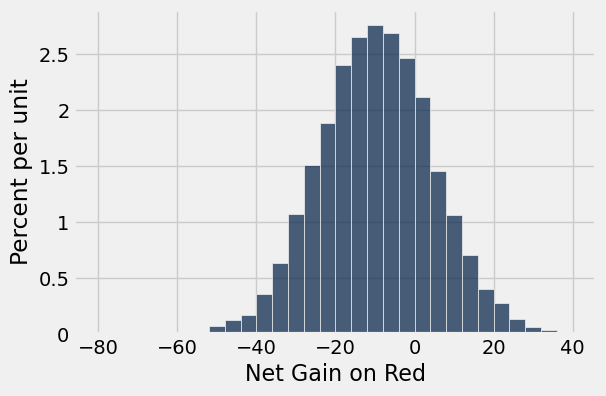

In [71]:
gains = Table().with_columns('Net Gain on Red', all_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

#### Task 06 📍

Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question.

_Points:_ 2

In [72]:
loss_more_than_50 = True

In [73]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ loss_more_than_50 is a bool value.

### Betting on a Split

If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bets pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

#### Task 07 📍

Define a function `dollar_bet_on_5_6_split`.
1. The function should have 1 argument (type `str`) that represents the pocket number
2. The function should return the gain in dollars if that pocket won and they had bet one dollar on the 5-6 split.

Remember that the pockets are represented as strings.

_Points:_ 4

In [74]:
def dollar_bet_on_5_6_split(pocket):
    if pocket == '5' or pocket == '6':
        return 17
    else:
        return -1

In [75]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your function returned the correct value for the 5 pocket.
task_07 - 2 message: ✅ Your function returned the correct value for the 00 pocket.

Run the cell below to check that your function is doing what it should.

In [76]:
print(dollar_bet_on_5_6_split('5'))
print(dollar_bet_on_5_6_split('6'))
print(dollar_bet_on_5_6_split('00'))
print(dollar_bet_on_5_6_split('23'))

17
17
-1
-1


#### Task 08 📍

Add a column `'Winnings: 5-6 Split'` to the end of the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split.

_Points:_ 3

In [83]:
split_winnings = wheel.apply(dollar_bet_on_5_6_split, 'Pocket')
wheel = wheel.with_column('Winnings: 5-6 Split', split_winnings)

In [84]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your last column label is 'Winnings: 5-6 Split'.
task_08 - 2 message: ✅ The added column value associated with the 5 pocket is correct.

#### Task 09 📍

1. Simulate the net gain in 200 one-dollar bets on the 5-6 split.
2. Repeat the simulation for a total of 10,000 times.
3. Store your gains in the array `all_gains_split`.

_Points:_ 2

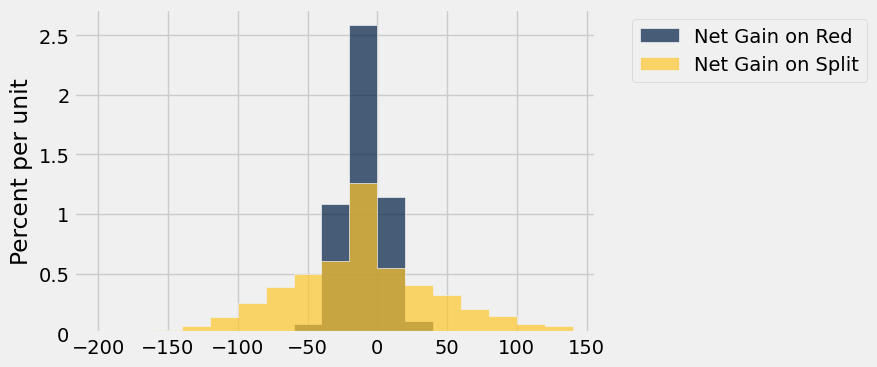

In [116]:
all_gains_split = make_array()

def net_gain_split(numofbets):
    netgain = wheel.sample(numofbets)
    return sum(netgain.column("Winnings: 5-6 Split"))

bets = 200
repeat = 10000

for i in np.arange(repeat):
    newbets = net_gain_split(bets)
    all_gains_split = np.append(all_gains_split, newbets)

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', all_gains_split)
gains.hist(bins=np.arange(-200, 150, 20))


In [108]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ There are 10,000 items in all_gains_split.

#### Task 10 📍

Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram.

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

Notice that you've already seen one of these statements in a prior question.

_Points:_ 5

In [91]:
histogram_statements = make_array(1, 3)

In [117]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ histogram_statements is an array.
task_10 - 2 message: ✅ histogram_statements contains at least one integer.

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

## Submit your Homework to Canvas

Once you have finished working on the homework tasks, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the rubric to know how you will be scored for this assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `"grader.check_all()"`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
3. Select the menu item "File" and "Save Notebook" in the notebook's Toolbar to save your work and create a specific checkpoint in the notebook's work history.
4. Select the menu items "File", "Download" in the notebook's Toolbar to download the notebook (.ipynb) file. 
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded .ipynb file.

**Keep in mind that the autograder does not always check for correctness. Sometimes it just checks for the format of your answer, so passing the autograder for a question does not mean you got the answer correct for that question.**

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [118]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ Your function correctly returns 1 when it is called on 'red'.

task_02 results: All test cases passed!
task_02 - 1 message: ✅ It seems that red_winnings is an array.
task_02 - 2 message: ✅ wheel is a table with the correct labels.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ ten_bets has 10 rows.
task_03 - 2 message: ✅ ten_bets has the same column labels as wheels.
task_03 - 3 message: ✅ sum_bets is an integer.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ There is essentially no chance that the net gain for 2 rounds of 10,000 bets should the same.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ all_gains_red is an array with 10,000 items.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ loss_more_than_50 is a bool value.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your function returned the correct value for the 5 pocket.
task_07 - 2 me